In [67]:
import pandas as pd
import numpy as np
from time import time
from pprint import PrettyPrinter

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
pp = PrettyPrinter()

# Load

In [2]:
df = pd.read_csv('data/application_train_pca.csv')
df.head()

,sk_id_curr,target,0,1,2,3,4,5,6,7,...,28,29,30,31,32,33,34,35,36,37
0,100002,1,0.311091,-1.332634,-0.399883,-2.000222,0.390812,0.672156,-0.191782,1.242912,...,0.094919,0.108869,-0.097447,0.207195,1.110724,-0.885310,0.271509,0.201748,0.078745,-1.013988
1,100003,0,1.003885,2.295670,-0.859131,-1.410614,0.350578,-0.441695,1.138504,-0.655109,...,0.215964,0.051572,0.488226,-0.041404,-0.785569,1.252293,1.370241,-0.178892,-0.732245,0.653229
2,100004,0,-0.356299,-2.745839,0.603927,-0.145268,2.845680,-0.206305,-1.628813,-0.740097,...,-0.140227,0.215135,-0.424872,0.097197,0.123388,0.143478,0.539556,0.226337,-0.640607,-1.492682
3,100006,0,-0.452229,-0.706371,-1.026894,-1.142946,-0.490824,-0.542183,-0.185623,0.939177,...,0.015248,-0.032642,-0.234938,-0.217559,0.080454,-0.554469,-0.494474,0.734851,-0.315487,0.781315
4,100007,0,0.396743,-0.732436,2.179659,-0.024886,1.154158,2.721180,-2.287210,0.657978,...,0.434943,0.120781,-0.307910,-0.718415,-0.035805,-1.283724,0.026249,0.483156,2.127985,-0.200012


In [3]:
train = df[df.columns[2:]]
target = df['target']

# Modeling

In [4]:
def model_fit(model, train, target, timed=True, feature_importance=False):
    '''
    This function is for checking performance of a single model. 
    
    Optional plot of feature importance for ensemble methods.
    '''
    # Fit and Predict
    if timed:
        start = time()
        passed = time() - start
        print(f'Seconds to start: {passed:.2f}')
    model.fit(train, target)
    if timed:
        passed = time() - start
        print(f'Seconds to fit: {passed:.2f}')
    
    # CV
    cv_score = cross_validation.cross_val_score(model, train, target, cv=5, scoring='roc_auc')
    print(f'CV Score : Mean - {np.mean(cv_score):.3f} | Std - {np.std(cv_score):.3f} | Min - {np.min(cv_score):.3f} | Max - {np.max(cv_score):.3f}')
    if timed:
        passed = time() - start
        print(f'Seconds to CV: {passed:.2f}')
    
    # Plots feature importance, for ensemble models only
    if feature_importance:
        feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [5]:
def grid_searcher(model, train, target, parameters={}, cv=4, timed=True):
    '''
    Makes a printout of the AUC score for gridsearched models.
    '''
    if timed:
        start = time()
        passed = time() - start
        print(f'Seconds to start: {passed:.2f}')
    gsearcher = GridSearchCV(
        estimator=model, 
        param_grid=parameters,
        scoring='roc_auc',
        n_jobs=4,
        cv=cv)
    gsearcher.fit(train, target)
    if timed:
        passed = time() - start
        print(f'Seconds to fit: {passed:.2f}')
    print('Grid Scores: \n')
    pp.pprint(gsearcher.cv_results_)
    print(f'Best Model Parameters: {gsearcher.best_params_}')
    print(f'Best Model Score: {gsearcher.best_score_:.4f}')

## Naive Bayes

For Funnsies

In [69]:
grid_searcher(GaussianNB(), train, target)

Seconds to start: 0.00
Seconds to fit: 2.61
Grid Scores: 

{'mean_fit_time': array([0.57424241]),
 'mean_score_time': array([0.16385829]),
 'mean_test_score': array([0.63585457]),
 'mean_train_score': array([0.63620212]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.66536437]),
 'split0_train_score': array([0.66500492]),
 'split1_test_score': array([0.63106633]),
 'split1_train_score': array([0.62473171]),
 'split2_test_score': array([0.62023497]),
 'split2_train_score': array([0.62882607]),
 'split3_test_score': array([0.6267519]),
 'split3_train_score': array([0.62624578]),
 'std_fit_time': array([0.10114609]),
 'std_score_time': array([0.02379337]),
 'std_test_score': array([0.01746852]),
 'std_train_score': array([0.01669361])}
Best Model Parameters: {}
Best Model Score: 0.6359


## Logistic Regression

Did a L1 Vs. L2 run. Same AUC (0.0688 w/ C=1.0). But took more than 10 times as long to fit, so don't use it.

In [59]:
parameters = {
    'C': np.logspace(-2, 5, 8)
}
grid_searcher(LogisticRegression(), train, target, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 85.71
Grid Scores: 

{'mean_fit_time': array([ 6.74909526,  7.93353075, 13.28336269,  9.04026347, 10.95242119,
        9.88661391,  8.97505802,  9.24396497]),
 'mean_score_time': array([0.07046926, 0.04790127, 0.06197524, 0.04607099, 0.05425823,
       0.04637903, 0.0476833 , 0.04011935]),
 'mean_test_score': array([0.68675385, 0.68782749, 0.68813003, 0.68814998, 0.68815127,
       0.68815128, 0.68815131, 0.68815129]),
 'mean_train_score': array([0.68741683, 0.68844141, 0.68868085, 0.68868879, 0.68868906,
       0.68868914, 0.68868913, 0.68868913]),
 'param_C': masked_array(data=[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 0.01},
            {'C': 0.1},
            {'C': 1.0},
            {'C': 10.0},
            {'C': 100.0},
            {'C': 1000.0},
            {'C': 10000.0},
            

Text(0,0.5,'AUC Score')

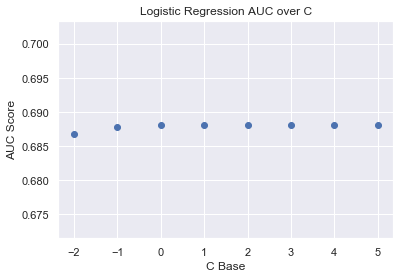

In [64]:
x = range(-2, 6)
logreg_AUC_means = [0.68675385, 0.68782749, 0.68813003, 0.68814998, 0.68815127,
       0.68815128, 0.68815131, 0.68815129]
plt.scatter(x=x, y=logreg_AUC_means)
plt.title('Logistic Regression AUC over C')
plt.xlabel('C Base')
plt.ylabel('AUC Score')

C with 1,000 and 10,000 are just marginally better than 100 so sticking with 100.

In [65]:
model = LogisticRegression(C=100)

model_fit(model, train, target)

Seconds to start: 0.00
Seconds to fit: 5.19
CV Score : Mean - 0.688 | Std - 0.002 | Min - 0.686 | Max - 0.691
Seconds to CV: 30.28


## KNN

In [82]:
parameters = {}
grid_searcher(KNeighborsClassifier(), train[:1000], target[:1000], parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 0.30
Grid Scores: 

{'mean_fit_time': array([0.00845522]),
 'mean_score_time': array([0.02241725]),
 'mean_test_score': array([0.52674497]),
 'mean_train_score': array([0.90104145]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.55293276]),
 'split0_train_score': array([0.89595519]),
 'split1_test_score': array([0.47627563]),
 'split1_train_score': array([0.90339091]),
 'split2_test_score': array([0.53815923]),
 'split2_train_score': array([0.90639023]),
 'split3_test_score': array([0.5398073]),
 'split3_train_score': array([0.89842948]),
 'std_fit_time': array([0.00098422]),
 'std_score_time': array([0.0018546]),
 'std_test_score': array([0.02977244]),
 'std_train_score': array([0.00408723])}
Best Model Parameters: {}
Best Model Score: 0.5267


In [80]:
parameters = {}
grid_searcher(KNeighborsClassifier(), train[:10000], target[:10000], parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 13.98
Grid Scores: 

{'mean_fit_time': array([0.03860927]),
 'mean_score_time': array([3.47560292]),
 'mean_test_score': array([0.55925109]),
 'mean_train_score': array([0.90473996]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.57021548]),
 'split0_train_score': array([0.90351992]),
 'split1_test_score': array([0.55509719]),
 'split1_train_score': array([0.90815545]),
 'split2_test_score': array([0.55631544]),
 'split2_train_score': array([0.90518849]),
 'split3_test_score': array([0.55537031]),
 'split3_train_score': array([0.902096]),
 'std_fit_time': array([0.00539002]),
 'std_score_time': array([0.10222352]),
 'std_test_score': array([0.0063481]),
 'std_train_score': array([0.00225531])}
Best Model Parameters: {}
Best Model Score: 0.5593


In [81]:
parameters = {}
grid_searcher(KNeighborsClassifier(), train[:50000], target[:50000], parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 250.46
Grid Scores: 

{'mean_fit_time': array([0.25517172]),
 'mean_score_time': array([64.12995625]),
 'mean_test_score': array([0.55795376]),
 'mean_train_score': array([0.899545]),
 'params': [{}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.55891313]),
 'split0_train_score': array([0.89847673]),
 'split1_test_score': array([0.54330993]),
 'split1_train_score': array([0.89891288]),
 'split2_test_score': array([0.56728112]),
 'split2_train_score': array([0.89845786]),
 'split3_test_score': array([0.56231306]),
 'split3_train_score': array([0.90233251]),
 'std_fit_time': array([0.01521097]),
 'std_score_time': array([2.42269303]),
 'std_test_score': array([0.00896345]),
 'std_train_score': array([0.00161963])}
Best Model Parameters: {}
Best Model Score: 0.5580


---

Training time is increasing by n^2 - the whole dataset of 300k would take ~9000 seconds to train locally (2.5 hours). Not worth it if it can't even tickle ~0.6 AUC. I'll gridsearch on a subset of data later (just 30k instead of the 50k above).

---

In [92]:
x_train, y_train, x_test, y_test = train_test_split(train, target,test_size=0.9, random_state=42)

parameters = {
    'n_neighbors': range(3, 20, 4)
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 529.45
Grid Scores: 

{'mean_fit_time': array([0.14385247, 0.12380219, 0.11354631, 0.11212033, 0.1148473 ]),
 'mean_score_time': array([23.35089755, 25.75460583, 27.42709237, 28.14374775, 29.16809601]),
 'mean_test_score': array([0.54479748, 0.57184604, 0.5852932 , 0.59513264, 0.60120883]),
 'mean_train_score': array([0.94035583, 0.8690169 , 0.82673626, 0.80059894, 0.78296345]),
 'param_n_neighbors': masked_array(data=[3, 7, 11, 15, 19],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 3},
            {'n_neighbors': 7},
            {'n_neighbors': 11},
            {'n_neighbors': 15},
            {'n_neighbors': 19}],
 'rank_test_score': array([5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.54261571, 0.55548418, 0.57401941, 0.58244802, 0.58998957]),
 'split0_train_score': array([0.93969433, 0.87007617, 0.82979798, 0.80355858, 0.78675149]),
 'split1_t

---

0.6 AUC achieved. Go a little further before moving onto Random Forest.

---

In [95]:
parameters = {
    'n_neighbors': range(19, 40, 4)
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 780.18
Grid Scores: 

{'mean_fit_time': array([0.13688499, 0.11805701, 0.11368102, 0.11555791, 0.11695671,
       0.16096228]),
 'mean_score_time': array([30.27679992, 30.14938778, 33.44042993, 33.92674637, 34.22200781,
       34.94614708]),
 'mean_test_score': array([0.60120883, 0.60896516, 0.61627274, 0.62263232, 0.63040065,
       0.63615329]),
 'mean_train_score': array([0.78296345, 0.77062483, 0.76191558, 0.75613101, 0.7504163 ,
       0.74531885]),
 'param_n_neighbors': masked_array(data=[19, 23, 27, 31, 35, 39],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 19},
            {'n_neighbors': 23},
            {'n_neighbors': 27},
            {'n_neighbors': 31},
            {'n_neighbors': 35},
            {'n_neighbors': 39}],
 'rank_test_score': array([6, 5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.58998957, 0.60165653, 0.60509818, 

---

Hmmm....see how much further this can go...

---

In [97]:
parameters = {
    'n_neighbors': [50, 60]
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 295.30
Grid Scores: 

{'mean_fit_time': array([0.13802606, 0.14722174]),
 'mean_score_time': array([37.02309197, 37.94940591]),
 'mean_test_score': array([0.63783752, 0.64099169]),
 'mean_train_score': array([0.73386181, 0.72569142]),
 'param_n_neighbors': masked_array(data=[50, 60],
             mask=[False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 50}, {'n_neighbors': 60}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.6208874, 0.623075 ]),
 'split0_train_score': array([0.74124953, 0.73368386]),
 'split1_test_score': array([0.63690405, 0.6394443 ]),
 'split1_train_score': array([0.73497644, 0.72808635]),
 'split2_test_score': array([0.65288993, 0.65484452]),
 'split2_train_score': array([0.72698929, 0.71750481]),
 'split3_test_score': array([0.64066905, 0.64660368]),
 'split3_train_score': array([0.73223196, 0.72349067]),
 'std_fit_time': array([0.02070816, 0.01507383]

In [98]:
parameters = {
    'n_neighbors': [80, 100]
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 301.32
Grid Scores: 

{'mean_fit_time': array([0.13332397, 0.12818938]),
 'mean_score_time': array([38.5567435 , 35.97088635]),
 'mean_test_score': array([0.64338975, 0.64766161]),
 'mean_train_score': array([0.7124254 , 0.70654365]),
 'param_n_neighbors': masked_array(data=[80, 100],
             mask=[False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 80}, {'n_neighbors': 100}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.6236616 , 0.62384183]),
 'split0_train_score': array([0.72169498, 0.71548974]),
 'split1_test_score': array([0.63679022, 0.64489122]),
 'split1_train_score': array([0.71224388, 0.70842726]),
 'split2_test_score': array([0.6557105 , 0.66277531]),
 'split2_train_score': array([0.70672402, 0.6987411 ]),
 'split3_test_score': array([0.6573985 , 0.65913955]),
 'split3_train_score': array([0.70903874, 0.70351649]),
 'std_fit_time': array([0.01960268, 0.01434

In [100]:
parameters = {
    'n_neighbors': range(125, 201, 25)
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 631.65
Grid Scores: 

{'mean_fit_time': array([0.1325593 , 0.13325483, 0.11910671, 0.12345225]),
 'mean_score_time': array([35.31970727, 36.95936239, 37.04843122, 37.57638675]),
 'mean_test_score': array([0.65137785, 0.65149116, 0.65325445, 0.6551905 ]),
 'mean_train_score': array([0.69928784, 0.69407967, 0.6912033 , 0.68840554]),
 'param_n_neighbors': masked_array(data=[125, 150, 175, 200],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 125},
            {'n_neighbors': 150},
            {'n_neighbors': 175},
            {'n_neighbors': 200}],
 'rank_test_score': array([4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.62910782, 0.62703579, 0.62839225, 0.62880188]),
 'split0_train_score': array([0.70786338, 0.70223947, 0.69951348, 0.69663934]),
 'split1_test_score': array([0.6472763 , 0.64666197, 0.6470314 , 0.65078563]),
 'split1_train_score': array([0.7011114

In [101]:
parameters = {
    'n_neighbors': range(200, 401, 50)
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 872.22
Grid Scores: 

{'mean_fit_time': array([0.14175755, 0.12903881, 0.12424058, 0.15267181, 0.16963798]),
 'mean_score_time': array([43.57783151, 47.51412475, 41.36088622, 47.48112595, 47.85628557]),
 'mean_test_score': array([0.6551905 , 0.65488796, 0.65824526, 0.65794263, 0.65905535]),
 'mean_train_score': array([0.68840554, 0.68405795, 0.68213119, 0.68059386, 0.67906348]),
 'param_n_neighbors': masked_array(data=[200, 250, 300, 350, 400],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 200},
            {'n_neighbors': 250},
            {'n_neighbors': 300},
            {'n_neighbors': 350},
            {'n_neighbors': 400}],
 'rank_test_score': array([4, 5, 2, 3, 1], dtype=int32),
 'split0_test_score': array([0.62880188, 0.62885943, 0.62856922, 0.62816682, 0.63044517]),
 'split0_train_score': array([0.69663934, 0.69091696, 0.69076239, 0.69094394, 0.68928905

**Note***, Timings for the block below are not valid, operation was interupted.

In [102]:
parameters = {
    'n_neighbors': [400, 500, 600]
}
grid_searcher(KNeighborsClassifier(), x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 5543.41
Grid Scores: 

{'mean_fit_time': array([0.13964373, 0.11477357, 0.10823256]),
 'mean_score_time': array([39.60221505, 39.26024419, 40.91284329]),
 'mean_test_score': array([0.65905535, 0.66007587, 0.66221001]),
 'mean_train_score': array([0.67906348, 0.67673292, 0.67583827]),
 'param_n_neighbors': masked_array(data=[400, 500, 600],
             mask=[False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_neighbors': 400}, {'n_neighbors': 500}, {'n_neighbors': 600}],
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([0.63044517, 0.63049399, 0.63413369]),
 'split0_train_score': array([0.68928905, 0.68701126, 0.68536271]),
 'split1_test_score': array([0.65370884, 0.65648886, 0.65503314]),
 'split1_train_score': array([0.67959917, 0.67696626, 0.67786309]),
 'split2_test_score': array([0.67555279, 0.67580712, 0.68110538]),
 'split2_train_score': array([0.67435065, 0.67309981, 0.67073

Text(0,0.5,'AUC Score')

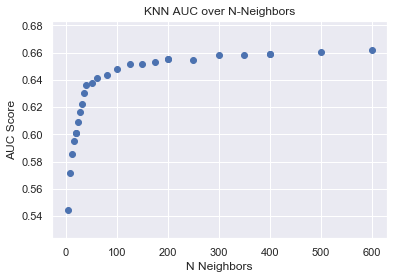

In [6]:
x = [3, 7, 11, 15, 19, 19, 23, 27, 31, 35, 39, 50, 60, 80, 100, 125, 150, 175, 200, 200, 250, 300, 350, 400, 400, 500, 600]
knn_AUC_means = [0.54479748, 0.57184604, 0.5852932 , 0.59513264, 0.60120883, 0.60120883, 0.60896516, 0.61627274, 0.62263232, 0.63040065,
       0.63615329, 0.63783752, 0.64099169, 0.64338975, 0.64766161, 0.65137785, 0.65149116, 0.65325445, 0.6551905, 0.6551905 , 0.65488796, 0.65824526, 0.65794263, 0.6590553, 0.65905535, 0.66007587, 0.66221001]
plt.scatter(x=x, y=knn_AUC_means)
plt.title('KNN AUC over N-Neighbors')
plt.xlabel('N Neighbors')
plt.ylabel('AUC Score')

---

For n_neighbors, could pick either 200 or the range 40-50. Going for 200 for that sweet sweet AUC.

Check final KNN model with model_fit function and 1/3 of total available training data instead of 1/10. 
Hoping to achieve ~0.66 AUC

---

In [10]:
x_train, y_train, x_test, y_test = train_test_split(train, target,test_size=2/3, random_state=42)

model = KNeighborsClassifier(n_neighbors=200)
model_fit(model, x_train, x_test)

Seconds to start: 0.00
Seconds to fit: 0.39
CV Score : Mean - 0.662 | Std - 0.005 | Min - 0.655 | Max - 0.670
Seconds to CV: 987.14


---

Huzzah! AUC of 0.662 w/ k=200. Done with KNN now. It was much closer to logistic regression than I had first anticipated.

---

## Random Forest

### Data

Here I'll be working with a dataset 1/5 of the total training set; verifying last AUC with more data in the end with model_fit.

In [19]:
x_train, y_train, x_test, y_test = train_test_split(train, target,test_size=4/5, random_state=42)

### Benchmark

Seconds to start: 0.00
Seconds to fit: 36.94
CV Score : Mean - 0.590 | Std - 0.006 | Min - 0.583 | Max - 0.598
Seconds to CV: 170.66


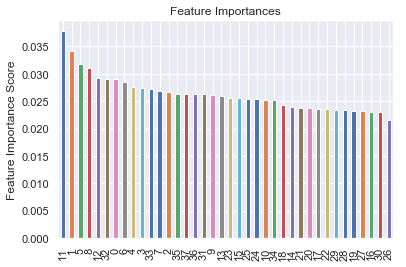

In [53]:
model = RandomForestClassifier()

model_fit(model, train, target, feature_importance=True)

---
### n_estimators

In [20]:
parameters = {
    'n_estimators': range(10, 86, 15)
}

model = RandomForestClassifier(
    min_samples_split=1000,
    min_samples_leaf=50,
    max_depth=8,
    random_state=42
)

grid_searcher(model, x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 85.40
Grid Scores: 

{'mean_fit_time': array([ 2.41849893,  5.78911066,  9.27150947, 12.4912101 , 18.31551629,
       21.91529477]),
 'mean_score_time': array([0.038697  , 0.05975473, 0.09324604, 0.11985546, 0.16689324,
       0.18642569]),
 'mean_test_score': array([0.66541025, 0.67292908, 0.67538656, 0.67637215, 0.67591569,
       0.67562305]),
 'mean_train_score': array([0.71862691, 0.72924253, 0.73291748, 0.73430775, 0.73499939,
       0.73517863]),
 'param_n_estimators': masked_array(data=[10, 25, 40, 55, 70, 85],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_estimators': 10},
            {'n_estimators': 25},
            {'n_estimators': 40},
            {'n_estimators': 55},
            {'n_estimators': 70},
            {'n_estimators': 85}],
 'rank_test_score': array([6, 5, 4, 1, 2, 3], dtype=int32),
 'split0_test_score': array([0.67300514, 0.67942708, 0.6792

In [22]:
parameters = {
    'n_estimators': range(100, 201, 25)
}

model = RandomForestClassifier(
    min_samples_split=1000,
    min_samples_leaf=50,
    max_depth=8,
    random_state=42
)

grid_searcher(model, x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 233.71
Grid Scores: 

{'mean_fit_time': array([24.06901354, 32.14482266, 37.79112232, 44.34354621, 47.54860002]),
 'mean_score_time': array([0.22121155, 0.27254778, 0.33757973, 0.3910768 , 0.40888357]),
 'mean_test_score': array([0.67621946, 0.67623844, 0.67650603, 0.67691156, 0.67702076]),
 'mean_train_score': array([0.73559113, 0.73610113, 0.73665369, 0.73714873, 0.73718065]),
 'param_n_estimators': masked_array(data=[100, 125, 150, 175, 200],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_estimators': 100},
            {'n_estimators': 125},
            {'n_estimators': 150},
            {'n_estimators': 175},
            {'n_estimators': 200}],
 'rank_test_score': array([5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.67952436, 0.67870042, 0.67970847, 0.68027118, 0.68025873]),
 'split0_train_score': array([0.7367492 , 0.73726867, 0.73836452, 0.73858742, 0.73

Text(0,0.5,'AUC Score')

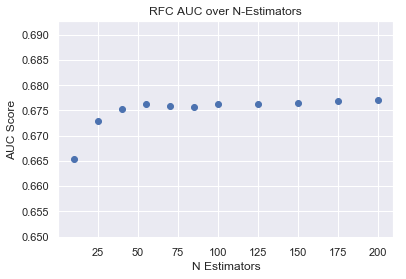

In [23]:
x = [10, 25, 40, 55, 70, 85, 100, 125, 150, 175, 200]
rfc_AUC_means = [0.66541025, 0.67292908, 0.67538656, 0.67637215, 0.67591569,
       0.67562305, 0.67621946, 0.67623844, 0.67650603, 0.67691156, 0.67702076]

plt.scatter(x=x, y=rfc_AUC_means)
plt.title('RFC AUC over N-Estimators')
plt.xlabel('N Estimators')
plt.ylabel('AUC Score')

55 trees performed the best, so for the model I'm using 50 trees

---
### max_depth

In [28]:
parameters = {
    'max_depth': range(4, 8)
}

model = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=1000,
    min_samples_leaf=50,
    random_state=42
)

grid_searcher(model, x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 55.61
Grid Scores: 

{'mean_fit_time': array([ 9.17154944, 10.44019651, 11.68558347, 11.94682401]),
 'mean_score_time': array([0.15450639, 0.0974384 , 0.10815096, 0.11364484]),
 'mean_test_score': array([0.66605839, 0.67038921, 0.67375967, 0.67517438]),
 'mean_train_score': array([0.69496001, 0.70790343, 0.71817172, 0.72733198]),
 'param_max_depth': masked_array(data=[4, 5, 6, 7],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'max_depth': 4},
            {'max_depth': 5},
            {'max_depth': 6},
            {'max_depth': 7}],
 'rank_test_score': array([4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.67074759, 0.67586956, 0.68039061, 0.67797786]),
 'split0_train_score': array([0.69597449, 0.70736521, 0.71876886, 0.72828828]),
 'split1_test_score': array([0.66328684, 0.66897718, 0.67002497, 0.67282608]),
 'split1_train_score': array([0.69584602, 0.70816886, 0.71823738, 

In [25]:
parameters = {
    'max_depth': range(8, 12)
}

model = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=1000,
    min_samples_leaf=50,
    random_state=42
)

grid_searcher(model, x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 76.31
Grid Scores: 

{'mean_fit_time': array([15.48302126, 12.21226287, 15.59766972, 15.83098853]),
 'mean_score_time': array([0.20385128, 0.19473833, 0.1269415 , 0.18710726]),
 'mean_test_score': array([0.67641652, 0.67600583, 0.67678109, 0.67799914]),
 'mean_train_score': array([0.73391548, 0.73947752, 0.74340755, 0.74532288]),
 'param_max_depth': masked_array(data=[8, 9, 10, 11],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'max_depth': 8},
            {'max_depth': 9},
            {'max_depth': 10},
            {'max_depth': 11}],
 'rank_test_score': array([3, 4, 2, 1], dtype=int32),
 'split0_test_score': array([0.6799588 , 0.67940179, 0.68088464, 0.68011025]),
 'split0_train_score': array([0.73455327, 0.74019539, 0.74265995, 0.74504806]),
 'split1_test_score': array([0.6751217 , 0.67502914, 0.67563062, 0.67767181]),
 'split1_train_score': array([0.73472372, 0.74052457, 0.743868

Text(0,0.5,'AUC Score')

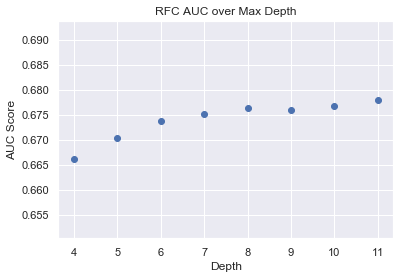

In [32]:
x = range(4,12)
rfc_AUC_means = [0.66605839, 0.67038921, 0.67375967, 0.67517438, 0.67641652, 0.67600583, 0.67678109, 0.67799914]

plt.scatter(x=x, y=rfc_AUC_means)
plt.title('RFC AUC over Max Depth')
plt.xlabel('Depth')
plt.ylabel('AUC Score')

Max Depth of 8 looks like a reasonable choice, but let's investigate it a bit more as 11 might actually be better.

In [37]:
parameters = {
    'max_depth': range(7, 15)
}

model = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=1000,
    min_samples_leaf=50,
    random_state=42
)

grid_searcher(model, x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 129.94
Grid Scores: 

{'mean_fit_time': array([11.87880766, 14.94747883, 13.15105629, 15.48897797, 14.98955208,
       14.92374051, 14.50487006, 13.34646446]),
 'mean_score_time': array([0.12242639, 0.14300817, 0.13096058, 0.15226901, 0.12715572,
       0.13818061, 0.13935226, 0.10274726]),
 'mean_test_score': array([0.67517438, 0.67641652, 0.67600583, 0.67678109, 0.67799914,
       0.67747145, 0.6769519 , 0.67762646]),
 'mean_train_score': array([0.72733198, 0.73391548, 0.73947752, 0.74340755, 0.74532288,
       0.74649659, 0.7475905 , 0.74814977]),
 'param_max_depth': masked_array(data=[7, 8, 9, 10, 11, 12, 13, 14],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'max_depth': 7},
            {'max_depth': 8},
            {'max_depth': 9},
            {'max_depth': 10},
            {'max_depth': 11},
            {'max_depth': 12},
            {'max_depth': 

Text(0,0.5,'AUC Score')

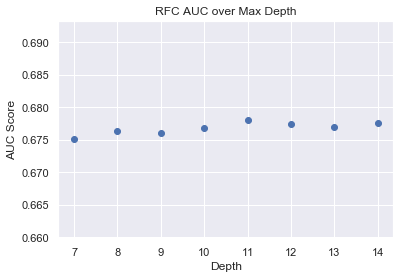

In [38]:
x = range(7,15)
rfc_AUC_means = [0.67517438, 0.67641652, 0.67600583, 0.67678109, 0.67799914,
       0.67747145, 0.6769519 , 0.67762646]

plt.scatter(x=x, y=rfc_AUC_means)
plt.title('RFC AUC over Max Depth')
plt.xlabel('Depth')
plt.ylabel('AUC Score')

Yep, going to stick with 11 instead as it keeps getting close to 0.678 and 8 stays around 0.676

---
### min_samples_split

In [40]:
parameters = {
    'min_samples_split': range(800, 1201, 100)
}

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=11,
    min_samples_leaf=50,
    random_state=42
)

grid_searcher(model, x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 87.57
Grid Scores: 

{'mean_fit_time': array([14.01755196, 15.54445738, 15.53078943, 13.2331264 , 13.65292591]),
 'mean_score_time': array([0.1656279 , 0.13513446, 0.12643909, 0.15957612, 0.10970151]),
 'mean_test_score': array([0.67742146, 0.67796323, 0.67799914, 0.67657605, 0.67503372]),
 'mean_train_score': array([0.75564907, 0.75052157, 0.74532288, 0.74071965, 0.73746494]),
 'param_min_samples_split': masked_array(data=[800, 900, 1000, 1100, 1200],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'min_samples_split': 800},
            {'min_samples_split': 900},
            {'min_samples_split': 1000},
            {'min_samples_split': 1100},
            {'min_samples_split': 1200}],
 'rank_test_score': array([3, 2, 1, 4, 5], dtype=int32),
 'split0_test_score': array([0.68237805, 0.6821026 , 0.68011025, 0.68004391, 0.67801525]),
 'split0_train_score': array([0.75552551, 0.751

Text(0,0.5,'AUC Score')

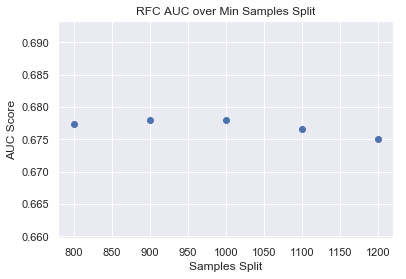

In [41]:
x = range(800, 1201, 100)
rfc_AUC_means = [0.67742146, 0.67796323, 0.67799914, 0.67657605, 0.67503372]

plt.scatter(x=x, y=rfc_AUC_means)
plt.title('RFC AUC over Min Samples Split')
plt.xlabel('Samples Split')
plt.ylabel('AUC Score')

1000 works for this one

---
### min_samples_leaf

In [44]:
parameters = {
    'min_samples_leaf': range(30, 91, 10)
}

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=11,
    min_samples_split=1000,
    random_state=42
)

grid_searcher(model, x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 114.00
Grid Scores: 

{'mean_fit_time': array([13.35721159, 12.54519409, 16.62812573, 13.56623012, 13.61580896,
       14.63730079, 12.69475079]),
 'mean_score_time': array([0.13563347, 0.13291544, 0.13600034, 0.12523907, 0.11619753,
       0.17711151, 0.09419072]),
 'mean_test_score': array([0.67661538, 0.67766949, 0.67799914, 0.67792479, 0.67731088,
       0.67753087, 0.67771314]),
 'mean_train_score': array([0.74924309, 0.74729625, 0.74532288, 0.74441573, 0.74358579,
       0.74287875, 0.74208766]),
 'param_min_samples_leaf': masked_array(data=[30, 40, 50, 60, 70, 80, 90],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'min_samples_leaf': 30},
            {'min_samples_leaf': 40},
            {'min_samples_leaf': 50},
            {'min_samples_leaf': 60},
            {'min_samples_leaf': 70},
            {'min_samples_leaf': 80},
            {'min_samples_leaf'

Text(0,0.5,'AUC Score')

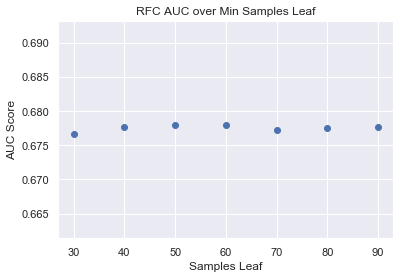

In [47]:
x = range(30, 91, 10)
rfc_AUC_means = [0.67661538, 0.67766949, 0.67799914, 0.67792479, 0.67731088,
       0.67753087, 0.67771314]

plt.scatter(x=x, y=rfc_AUC_means)
plt.title('RFC AUC over Min Samples Leaf')
plt.xlabel('Samples Leaf')
plt.ylabel('AUC Score')

50 looks like the best value but just really quickly want to make sure it needs to be that high

In [46]:
parameters = {
    'min_samples_leaf': range(5, 51, 5)
}

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=11,
    min_samples_split=1000,
    random_state=42
)

grid_searcher(model, x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 172.39
Grid Scores: 

{'mean_fit_time': array([15.68738717, 16.55180657, 16.33200127, 14.66370696, 13.99682313,
       16.2119202 , 15.62675303, 13.38833934, 16.24450034, 14.04426974]),
 'mean_score_time': array([0.15672737, 0.14881366, 0.14502013, 0.12682939, 0.12440944,
       0.13641214, 0.11948806, 0.1330505 , 0.22191596, 0.09997481]),
 'mean_test_score': array([0.67549166, 0.67607916, 0.67688768, 0.6757257 , 0.6760272 ,
       0.67661538, 0.6764529 , 0.67766949, 0.67769047, 0.67799914]),
 'mean_train_score': array([0.75891433, 0.75551262, 0.75308766, 0.7507847 , 0.75027918,
       0.74924309, 0.7475829 , 0.74729625, 0.74617076, 0.74532288]),
 'param_min_samples_leaf': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object),
 'params': [{'min_samples_leaf': 5},
            {'min_sample

Text(0,0.5,'AUC Score')

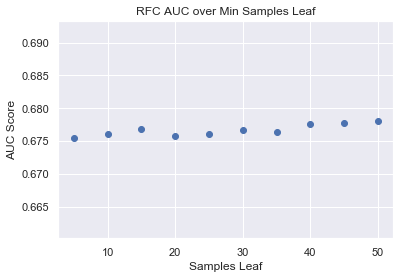

In [49]:
x = range(5, 51, 5)
rfc_AUC_means = [0.67549166, 0.67607916, 0.67688768, 0.6757257 , 0.6760272 ,
       0.67661538, 0.6764529 , 0.67766949, 0.67769047, 0.67799914]

plt.scatter(x=x, y=rfc_AUC_means)
plt.title('RFC AUC over Min Samples Leaf')
plt.xlabel('Samples Leaf')
plt.ylabel('AUC Score')

Yep, sticking with 50 for Samples Leaf

---
### max_features

Currently this is set to 'auto' which sets it to 'sqrt'. Meaning the sqrt of the number of input features. Since it's being fed 38 features that means the value is likely been 6 this whole time.

In [50]:
parameters = {
    'max_features': range(4, 10)
}

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=11,
    min_samples_split=1000,
    min_samples_leaf=50,
    random_state=42
)

grid_searcher(model, x_train, x_test, parameters=parameters)

Seconds to start: 0.00
Seconds to fit: 107.85
Grid Scores: 

{'mean_fit_time': array([10.90474957, 12.03899622, 15.06256139, 16.115578  , 18.27724868,
       19.65572619]),
 'mean_score_time': array([0.16999024, 0.13906127, 0.11861694, 0.13052452, 0.14702404,
       0.09590763]),
 'mean_test_score': array([0.67494209, 0.67589008, 0.67799914, 0.675083  , 0.67565238,
       0.67579716]),
 'mean_train_score': array([0.74584295, 0.74555125, 0.74532288, 0.74448963, 0.74464081,
       0.74590165]),
 'param_max_features': masked_array(data=[4, 5, 6, 7, 8, 9],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'max_features': 4},
            {'max_features': 5},
            {'max_features': 6},
            {'max_features': 7},
            {'max_features': 8},
            {'max_features': 9}],
 'rank_test_score': array([6, 2, 1, 5, 4, 3], dtype=int32),
 'split0_test_score': array([0.67831588, 0.67748109, 0.68011025, 0.678

Text(0,0.5,'AUC Score')

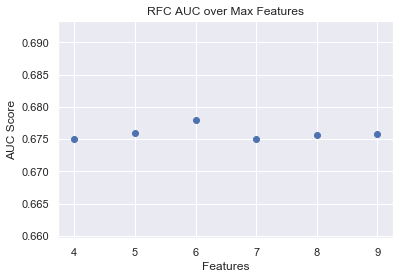

In [51]:
x = range(4, 10)
rfc_AUC_means = [0.67494209, 0.67589008, 0.67799914, 0.675083  , 0.67565238,
       0.67579716]

plt.scatter(x=x, y=rfc_AUC_means)
plt.title('RFC AUC over Max Features')
plt.xlabel('Features')
plt.ylabel('AUC Score')

Cool. Sticking with 6, which is the default value in this case.

### Final RFC Model

Seconds to start: 0.00
Seconds to fit: 100.41
CV Score : Mean - 0.684 | Std - 0.003 | Min - 0.681 | Max - 0.687
Seconds to CV: 453.60


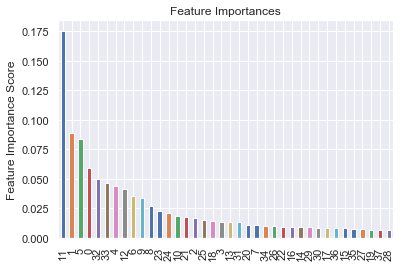

In [52]:
model = RandomForestClassifier(
    n_estimators=50,
    max_depth=11,
    min_samples_split=1000,
    min_samples_leaf=50,
    random_state=42
)

model_fit(model, train, target, feature_importance=True)

AUC went from 0.590 to 0.684. Not bad! Training time tripled but oh well. 

- First five PCA columns pre-train: 11, 1, 5, 8, 12
- First five PCA columns post-train: 11, 1, 5, 0, 32

In the end, still behind Logistic Regression by 0.004